In [1]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
#%cd /content/drive/My-Drive/
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math

Mounted at /content/gdrive/


In [2]:
raw = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test8.csv')
raw

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2018-06-11,66.419998,62.356850,201.366592,139.268356,43.161572,35.760654,36.075409,29.904634,21.776939,91.941254
1,2018-06-12,68.554001,61.476101,204.039581,136.954926,42.667358,35.661705,39.682949,30.325052,21.423853,92.215569
2,2018-06-13,68.956001,62.444927,206.712601,138.805664,42.914463,35.008633,43.649250,29.952877,20.832191,91.884514
3,2018-06-14,71.543999,61.476101,201.812103,140.656418,42.667358,34.068604,48.014175,29.692720,20.994423,93.937096
4,2018-06-15,71.634003,61.476101,205.821594,142.969833,42.832092,33.504589,52.817585,29.118149,20.813103,93.643867
...,...,...,...,...,...,...,...,...,...,...,...
746,2021-04-26,738.200012,104.000000,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
747,2021-04-27,704.739990,106.000000,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
748,2021-04-28,694.400024,104.500000,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
749,2021-04-29,677.000000,106.000000,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [3]:
td = raw.iloc[300:,:].reset_index(drop=True) ###調成和底下天數一樣
tdd = td.copy()
tdd = tdd.iloc[:,1:]
td['Date'] = pd.to_datetime(td.Date, format = '%Y/%m/%d')
td

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2019-08-06,46.150002,98.649635,237.117493,108.411499,46.422279,22.090000,72.042824,25.333572,14.131123,85.617088
1,2019-08-07,46.683998,99.133217,236.640381,106.939850,46.797409,21.840000,73.221069,25.017891,13.770038,85.887619
2,2019-08-08,47.660000,102.518250,241.888428,108.411499,46.891193,22.059999,72.971443,25.599932,13.896906,87.172699
3,2019-08-09,47.001999,102.518250,241.888428,108.411499,46.891193,22.440001,71.823143,24.879778,13.604134,86.737900
4,2019-08-12,45.801998,102.518250,239.502960,105.958748,46.844299,23.370001,73.261009,24.583826,13.174735,85.191948
...,...,...,...,...,...,...,...,...,...,...,...
446,2021-04-26,738.200012,104.000000,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
447,2021-04-27,704.739990,106.000000,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
448,2021-04-28,694.400024,104.500000,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
449,2021-04-29,677.000000,106.000000,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [4]:
rrr= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/traindays=200/result2021-05-13 14:55:27.csv')
rrr

,Unnamed: 0,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0,57.415140,82.349010,263.70090,108.154430,47.695800,37.798897,217.71541,27.366070,18.048763,72.07442
1,1,57.311234,83.263030,263.79240,108.015240,47.721016,37.544590,217.68854,27.487082,17.754740,72.18835
2,2,57.124626,85.016700,263.87020,108.225250,47.749744,36.807682,217.69736,27.312805,17.646225,72.17699
3,3,56.587475,85.542290,264.10217,108.082470,47.792892,36.357117,217.70352,26.959923,17.749434,72.18286
4,4,56.158510,85.190970,264.45440,107.954920,47.877777,35.704860,217.69630,26.745386,17.706104,72.10490
...,...,...,...,...,...,...,...,...,...,...,...
545,545,672.227840,106.296394,578.12213,106.356186,48.814045,31.663366,330.35474,51.139460,24.357346,124.86612
546,546,674.197600,105.623940,580.53046,104.777550,48.816006,31.584671,337.72083,51.510660,24.315474,124.40579
547,547,684.655330,105.587200,586.77430,103.745660,48.885914,31.571089,336.69630,51.855900,24.342861,124.58292
548,548,653.080260,106.228810,588.96704,102.253270,48.934196,31.456944,336.56284,52.217007,24.580256,125.54756


In [5]:
#rdf.iloc[:,1]= td.pop('Date')
rdf = rrr.iloc[99:,:].reset_index(drop=True)
rdf.iloc[:,0]= td['Date']
rdf

,Unnamed: 0,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2019-08-06,53.072180,105.829640,271.29572,105.706250,46.083210,27.530106,217.58788,26.591646,18.063997,76.09405
1,2019-08-07,53.005947,101.467870,269.20682,105.117600,45.852055,27.734346,217.58975,26.528234,16.848341,75.69859
2,2019-08-08,52.859920,99.123726,268.18024,105.676090,45.661648,27.054972,217.57999,26.223919,14.917131,75.23606
3,2019-08-09,52.673244,100.083190,268.18863,105.445854,45.632840,25.881746,217.57649,25.961185,14.103263,74.75253
4,2019-08-12,52.757618,101.640030,269.02335,105.737490,45.649063,25.028332,217.57004,25.945797,13.635355,74.48137
...,...,...,...,...,...,...,...,...,...,...,...
446,2021-04-26,672.227840,106.296394,578.12213,106.356186,48.814045,31.663366,330.35474,51.139460,24.357346,124.86612
447,2021-04-27,674.197600,105.623940,580.53046,104.777550,48.816006,31.584671,337.72083,51.510660,24.315474,124.40579
448,2021-04-28,684.655330,105.587200,586.77430,103.745660,48.885914,31.571089,336.69630,51.855900,24.342861,124.58292
449,2021-04-29,653.080260,106.228810,588.96704,102.253270,48.934196,31.456944,336.56284,52.217007,24.580256,125.54756


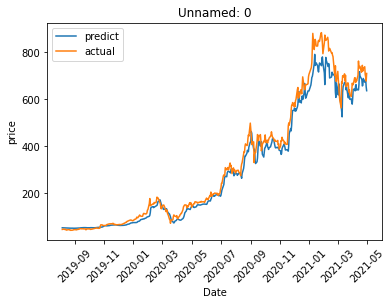

In [6]:
x= pd.to_datetime(td['Date'], format = '%Y/%m/%d')
y1= rdf['TSLA']
y2= td['TSLA']
plt.plot(x, y1, label= 'predict')
plt.plot(x, y2, label= 'actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.xticks(rotation= 45)
plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

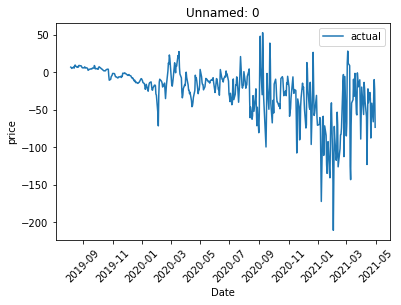

In [7]:
x= pd.to_datetime(td['Date'], format = '%Y/%m/%d')
y1= rdf['TSLA']
y2= td['TSLA']
#plt.plot(x, y1, label='predict')
#plt.plot(x, y2, label= 'actual')
plt.plot(x, y1-y2, label= 'actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.xticks(rotation= 45)
plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [8]:
pre_df=rdf.iloc[:,1:] #刪掉時間行
pre_df

#rdf['Unnamed: 0'] = pd.to_datetime(rdf.Date, format = '%Y/%m/%d')
#rdf

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,53.072180,105.829640,271.29572,105.706250,46.083210,27.530106,217.58788,26.591646,18.063997,76.09405
1,53.005947,101.467870,269.20682,105.117600,45.852055,27.734346,217.58975,26.528234,16.848341,75.69859
2,52.859920,99.123726,268.18024,105.676090,45.661648,27.054972,217.57999,26.223919,14.917131,75.23606
3,52.673244,100.083190,268.18863,105.445854,45.632840,25.881746,217.57649,25.961185,14.103263,74.75253
4,52.757618,101.640030,269.02335,105.737490,45.649063,25.028332,217.57004,25.945797,13.635355,74.48137
...,...,...,...,...,...,...,...,...,...,...
446,672.227840,106.296394,578.12213,106.356186,48.814045,31.663366,330.35474,51.139460,24.357346,124.86612
447,674.197600,105.623940,580.53046,104.777550,48.816006,31.584671,337.72083,51.510660,24.315474,124.40579
448,684.655330,105.587200,586.77430,103.745660,48.885914,31.571089,336.69630,51.855900,24.342861,124.58292
449,653.080260,106.228810,588.96704,102.253270,48.934196,31.456944,336.56284,52.217007,24.580256,125.54756


In [9]:
rdf_log= np.log(pre_df) #取log
rdf_diffk= rdf_log.diff(1).dropna().reset_index(drop=True) #取差分
rdf_diff_e= np.exp(rdf_diffk)-1 #報酬率
rdf_diff_e

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,-0.001248,-0.041215,-0.007700,-0.005569,-0.005016,0.007419,0.000009,-0.002385,-0.067297,-0.005197
1,-0.002755,-0.023102,-0.003813,0.005313,-0.004153,-0.024496,-0.000045,-0.011471,-0.114623,-0.006110
2,-0.003532,0.009679,0.000031,-0.002179,-0.000631,-0.043365,-0.000016,-0.010019,-0.054559,-0.006427
3,0.001602,0.015555,0.003112,0.002766,0.000356,-0.032974,-0.000030,-0.000593,-0.033177,-0.003627
4,-0.003019,0.012491,0.003435,0.000352,-0.000631,-0.021761,-0.000054,0.001678,-0.025460,-0.002546
...,...,...,...,...,...,...,...,...,...,...
445,-0.023209,-0.014912,-0.007219,-0.014474,0.002619,-0.004845,0.011849,-0.000169,-0.001381,-0.001099
446,0.002930,-0.006326,0.004166,-0.014843,0.000040,-0.002485,0.022298,0.007259,-0.001719,-0.003687
447,0.015511,-0.000348,0.010755,-0.009848,0.001432,-0.000430,-0.003034,0.006702,0.001126,0.001424
448,-0.046118,0.006077,0.003737,-0.014385,0.000988,-0.003615,-0.000396,0.006964,0.009752,0.007743


In [10]:
stock_num=pre_df.shape[1]
inv_days=pre_df.shape[0]-1
print(stock_num,inv_days)

10 450


In [11]:
#將預測報酬率為負的改為0(因為後續要變成權重)
rdf_return_po=rdf_diff_e.copy()
for i in range(stock_num):
  for j in range(inv_days):
    if (rdf_return_po.iloc[j, i] < 0):
      rdf_return_po.iloc[j, i]=0
rdf_return_po

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007419,0.000009,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.005313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.009679,0.000031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001602,0.015555,0.003112,0.002766,0.000356,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.012491,0.003435,0.000352,0.000000,0.000000,0.000000,0.001678,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
445,0.000000,0.000000,0.000000,0.000000,0.002619,0.000000,0.011849,0.000000,0.000000,0.000000
446,0.002930,0.000000,0.004166,0.000000,0.000040,0.000000,0.022298,0.007259,0.000000,0.000000
447,0.015511,0.000000,0.010755,0.000000,0.001432,0.000000,0.000000,0.006702,0.001126,0.001424
448,0.000000,0.006077,0.003737,0.000000,0.000988,0.000000,0.000000,0.006964,0.009752,0.007743


In [12]:
rdf_return_po.sum(axis=1)

0      0.007427
1      0.005313
2      0.009711
3      0.023391
4      0.017956
         ...   
445    0.014468
446    0.036692
447    0.036951
448    0.035260
449    0.022730
Length: 450, dtype: float64

In [13]:
rdf_diff=rdf_diff_e.copy()
pro_rdf_diff= pd.DataFrame(columns= rdf_diff.columns, index=rdf_diff.index)
pro_rdf_diff

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for i in range(inv_days):
  for j in range(stock_num):
    np.seterr(invalid='ignore')
    pro_rdf_diff.iloc[i,j]= rdf_return_po.iloc[i,j] / rdf_return_po.sum(axis=1)[i]

pro_rdf_diff.fillna(value=0)
pro_rdf_diff #投資權重

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0,0,0,0,0,0.998843,0.0011571,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0.996778,0.00322168,0,0,0,0,0,0,0
3,0.068481,0.665019,0.133061,0.11824,0.0151987,0,0,0,0,0
4,0,0.69563,0.191299,0.0195934,0,0,0,0.0934777,0,0
...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0.181002,0,0.818998,0,0,0
446,0.0798587,0,0.113533,0,0.00109486,0,0.60769,0.197823,0,0
447,0.419779,0,0.29107,0,0.0387557,0,0,0.181382,0.0304812,0.038532
448,0,0.172337,0.105983,0,0.0280104,0,0,0.197495,0.276579,0.219596


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/投資權重')
print(os.getcwd())#获取当前工作路径

outstr= '200_451'+ '.csv'
pro_rdf_diff.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下
outstr

In [15]:
pro_rdf_diff.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
445    1.0
446    1.0
447    1.0
448    1.0
449    1.0
Length: 450, dtype: float64

In [ ]:
tdd_log= np.log(tdd)
tdd_diff= tdd_log.diff(1).dropna().reset_index(drop=True)
tdd_diff_e= np.exp(tdd_diff)-1
tdd_diff_e #真實報酬率

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.011571,0.004902,-0.002012,-0.013575,0.008081,-0.011317,0.016355,-0.012461,-0.025552,0.003160
1,0.020907,0.034146,0.022177,0.013761,0.002004,0.010073,-0.003409,0.023265,0.009213,0.014962
2,-0.013806,0.000000,0.000000,0.000000,0.000000,0.017226,-0.015736,-0.028131,-0.021067,-0.004988
3,-0.025531,0.000000,-0.009862,-0.022624,-0.001000,0.041444,0.020020,-0.011895,-0.031564,-0.017823
4,0.026156,0.028302,-0.017928,0.000000,-0.005005,0.003851,0.001363,-0.000803,0.000741,0.018260
...,...,...,...,...,...,...,...,...,...,...
445,0.012065,0.000000,0.013289,0.000000,0.011194,-0.006107,-0.060565,0.023574,-0.014801,0.003340
446,-0.045326,0.019231,0.000000,-0.004808,0.003690,0.006792,-0.001146,0.005201,0.013924,-0.000148
447,-0.014672,-0.014151,-0.013115,-0.009662,0.007353,0.049791,0.052869,0.023651,0.001446,0.005697
448,-0.025058,0.014354,-0.003322,0.009756,-0.003650,-0.022338,0.035310,0.016065,-0.045110,0.016627


In [ ]:
pro_rdf_diff.shape

(450, 10)

In [ ]:
tdd_diff_e.shape

(450, 10)

In [ ]:
profit= []
for i in range(inv_days):
    if i == 0:
        temp_profit= 1
    else:
        temp_profit=profit[-1]
    for j in range(stock_num):
        a = pro_rdf_diff.iloc[i,j] #投資權重
        b = tdd_diff_e.iloc[i,j] #真實報酬率
        temp_profit = temp_profit + (a * b)
    if (np.isnan(temp_profit) == True):
        temp_profit = profit[-1]
    profit.append(temp_profit)
print(profit)

[0.9887146813608604, 1.0024761479417248, 1.0024761479417248, 0.9967252322937639, 1.0129081973024703, 1.0621093857095403, 1.0485598685876294, 1.039077583888587, 1.066431515587946, 1.0710009296879477, 1.0625619051576425, 1.0632787469729632, 1.0573897234775442, 1.0423425241991278, 1.0537205092380175, 1.0433205844716804, 1.0405974497337127, 1.048121756838965, 1.055374469904658, 1.0347127618745495, 1.0519665969877854, 1.1159748153404012, 1.1250142054953116, 1.1421495341681984, 1.1632154592087283, 1.1473995249378328, 1.1336104802471072, 1.1616590593984673, 1.183329875368123, 1.1692206652350055, 1.1706674732445166, 1.1756068003069633, 1.1820710817830726, 1.178785682675081, 1.1980998721116871, 1.1888378540275215, 1.1764117805572518, 1.1781238268540384, 1.1770877306654013, 1.19742418519315, 1.1944714212189567, 1.1818805614967598, 1.1824830764617318, 1.1824830764617318, 1.196524985412806, 1.184667456291559, 1.1862125430217167, 1.166515111780831, 1.2285835908061198, 1.2316153389244981, 1.25059005

In [ ]:
pdf= pd.DataFrame(profit, columns=['p'])
pdf #利潤

,p
0,0.988715
1,1.002476
2,1.002476
3,0.996725
4,1.012908
...,...
445,2.094043
446,2.090760
447,2.085622
448,2.081989


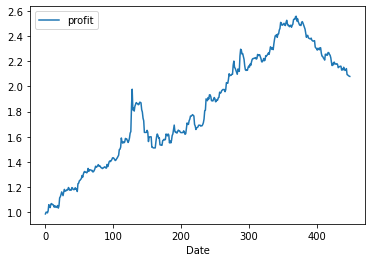

In [ ]:
x= pdf.index
y1= pdf['p']
plt.plot(x, y1, label='profit')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [ ]:
return_m = []
return_m.extend(profit)
for i in range(len(return_m)):
    return_m[i] = return_m[i] - 1
# print(return_m) #報酬率

In [ ]:
pdf= pd.DataFrame(return_m, columns=['p'])
pdf #報酬率

,p
0,-0.011285
1,0.002476
2,0.002476
3,-0.003275
4,0.012908
...,...
445,1.094043
446,1.090760
447,1.085622
448,1.081989


In [ ]:
# pdf.to_csv('td=100_1.csv', index=False)

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/報酬率')
print(os.getcwd())#获取当前工作路径

outstr= 'td=200_451'+ '.csv'
pdf.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下
outstr

/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/報酬率


'td=200_451.csv'

In [ ]:
pdf_return = pd.DataFrame(return_m, columns=['p'])
pdf_return
np.var(pdf_return)

p    0.189593
dtype: float64

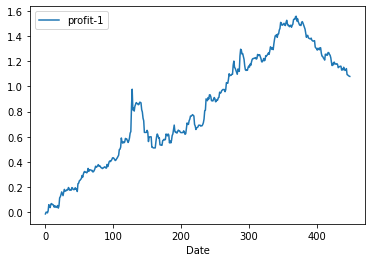

In [ ]:
x= pdf_return.index
y1= pdf['p']
plt.plot(x, y1, label='profit-1')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [ ]:
pdf1= pdf

for i in range(inv_days-1):
  n= i+1
  pdf1.iloc[i,0]=  pdf1.iloc[i-1,0]* pdf.iloc[i,0]

pdf1

,p
0,-2.324569e-02
1,5.174509e-04
2,-7.689401e-06
3,2.121149e-07
4,-3.179496e-09
...,...
545,-4.272013e-211
546,-3.936557e-211
547,-3.602591e-211
548,-3.222719e-211


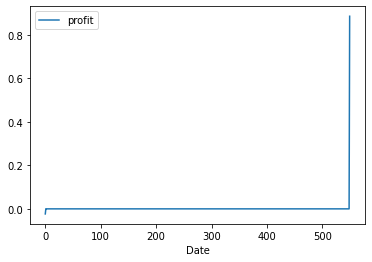

In [ ]:
x= pdf1.index
y1= pdf1['p']
plt.plot(x, y1, label='profit')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()